In [18]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
#tf.keras.backend.set_floatx('float64')

In [19]:
# read the csv data into a pandas dataframe and set the date as the index
# df = pd.read_csv('end-part2_df.csv').set_index('date')
with open('end-part1_df.pkl', 'rb') as fp:
    df = pickle.load(fp)

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatureMean,197.0,83.285072,4.785616,78.228333,79.299583,80.155417,88.09625,92.845833
temperatureMax,197.0,93.116650,5.210954,87.790000,88.890000,89.740000,98.28000,106.580000
temperatureMin,197.0,74.564873,4.465296,69.930000,70.990000,71.820000,78.11000,82.950000
temperatureMean_1,197.0,83.312329,4.771940,78.349167,79.347917,80.155833,88.09625,92.845833
temperatureMean_2,197.0,83.349818,4.761749,78.469167,79.352500,80.157917,88.09625,92.845833
temperatureMean_3,197.0,83.393234,4.756010,78.560417,79.374583,80.269583,88.09625,92.845833
dewPoint_1,197.0,67.125939,4.704913,45.300000,65.470000,68.660000,70.53000,71.080000
dewPoint_2,197.0,67.110203,4.718033,45.300000,65.470000,68.660000,70.53000,71.080000
dewPoint_3,197.0,67.092538,4.732617,45.300000,65.470000,68.660000,70.53000,71.080000
humidity_1,197.0,0.622234,0.152667,0.230000,0.480000,0.670000,0.76000,0.790000


In [20]:
df.index = df.index.values.astype(float)

In [21]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 197 entries, 1.58652371064889e+18 to 1.60345811064889e+18
Data columns (total 21 columns):
temperatureMean        197 non-null float64
temperatureMax         197 non-null float64
temperatureMin         197 non-null float64
temperatureMean_1      197 non-null float64
temperatureMean_2      197 non-null float64
temperatureMean_3      197 non-null float64
dewPoint_1             197 non-null float64
dewPoint_2             197 non-null float64
dewPoint_3             197 non-null float64
humidity_1             197 non-null float64
humidity_2             197 non-null float64
humidity_3             197 non-null float64
temperatureMax_1       197 non-null float64
temperatureMax_2       197 non-null float64
temperatureMax_3       197 non-null float64
temperatureMin_1       197 non-null float64
temperatureMin_2       197 non-null float64
temperatureMin_3       197 non-null float64
precipProbability_1    197 non-null float64
precipProbability_2  

In [22]:
# First drop the maxtempm and mintempm from the dataframe
#print(df)
df = df.drop(['temperatureMin', 'temperatureMax'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'temperatureMean']]

# y will be a pandas series of the meantempm
y = df['temperatureMean']

In [23]:
# split data into training set and a temporary set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [24]:
# split the remaining 20% of data evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print('Training instances   {}, Training features   {}'.format(X_train.shape[0], X_train.shape[1]))
print('Validation instances {}, Validation features {}'.format(X_val.shape[0], X_val.shape[1]))
print('Testing instances    {}, Testing features    {}'.format(X_test.shape[0], X_test.shape[1]))

Training instances   157, Training features   18
Validation instances 20, Validation features 18
Testing instances    20, Testing features    18


In [25]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [26]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='~/Projects/machine-learning-predict-weather/tf_models/tf_wx_model')

In [27]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=X, y=y, num_epochs=num_epochs, shuffle=shuffle, batch_size=batch_size
    )

In [34]:
evaluations = []
STEPS = 400
for i in range(10):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    t = regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                           y_val,num_epochs=1,
                                                               shuffle=False))
    print(t)
    evaluations.append(t)
    #print(evaluations)

W0417 21:29:10.211975 101360 base_layer_v1.py:1808] Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

W0417 21:29:15.703247 101360 base_layer_v1.py:1808] Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you inte

{'average_loss': 1.0529233, 'label/mean': 83.93743, 'loss': 1.0529233, 'prediction/mean': 84.144264, 'global_step': 152400}
{'average_loss': 1.0530407, 'label/mean': 83.93743, 'loss': 1.0530407, 'prediction/mean': 84.14494, 'global_step': 152800}
{'average_loss': 1.0528708, 'label/mean': 83.93743, 'loss': 1.0528708, 'prediction/mean': 84.14497, 'global_step': 153200}
{'average_loss': 1.0523304, 'label/mean': 83.93743, 'loss': 1.0523304, 'prediction/mean': 84.14408, 'global_step': 153600}
{'average_loss': 1.0528333, 'label/mean': 83.93743, 'loss': 1.0528333, 'prediction/mean': 84.1456, 'global_step': 154000}
{'average_loss': 1.0519695, 'label/mean': 83.93743, 'loss': 1.0519695, 'prediction/mean': 84.14397, 'global_step': 154400}
{'average_loss': 1.0520322, 'label/mean': 83.93743, 'loss': 1.0520322, 'prediction/mean': 84.14457, 'global_step': 154800}
{'average_loss': 1.0521231, 'label/mean': 83.93743, 'loss': 1.0521231, 'prediction/mean': 84.14518, 'global_step': 155200}
{'average_loss':

In [29]:
evaluations[0]

{'average_loss': 1.0548695,
 'label/mean': 83.93743,
 'loss': 1.0548695,
 'prediction/mean': 84.14476,
 'global_step': 148400}

In [30]:
evaluations[-1]

{'average_loss': 1.0534436,
 'label/mean': 83.93743,
 'loss': 1.0534436,
 'prediction/mean': 84.145065,
 'global_step': 152000}

Text(0, 0.5, 'Loss (SSE)')

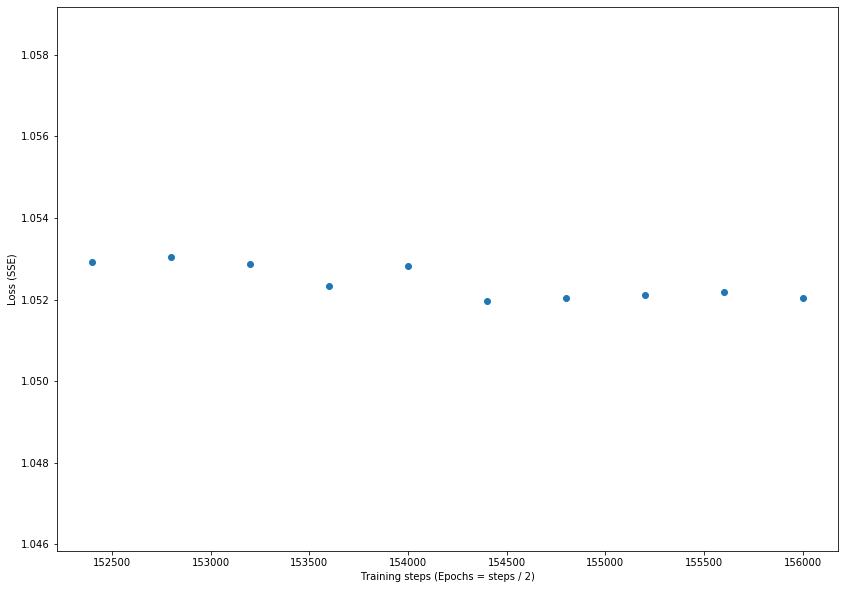

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x=training_steps, y=loss_values)
ax.set_xlabel('Training steps (Epochs = steps / 2)')
ax.set_ylabel('Loss (SSE)')

In [37]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])
print(predictions)

print('The Explained Variance: %.2f' % explained_variance_score(y_test, predictions))
print('The Mean Absolute Error: %.2f degrees Celcius' % mean_absolute_error(y_test, predictions))
print('The Median Absolute Error: %.2f degrees Celcius' % median_absolute_error(y_test, predictions))

W0417 21:57:06.840577 101360 base_layer_v1.py:1808] Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



[79.95547  86.70685  78.65669  84.941864 79.99644  79.98505  92.30533
 79.85306  79.7074   91.40236  78.49922  81.99409  89.108604 80.141235
 79.9996   85.60927  90.08443  84.063934 78.40161  78.59789 ]
The Explained Variance: 0.99
The Mean Absolute Error: 0.32 degrees Celcius
The Median Absolute Error: 0.25 degrees Celcius
